<font face="Times New Roman" size=5>
<div dir=rtl align="center">
<font face="Times New Roman" size=5>
</font>
<br>
<img src="https://static.tildacdn.one/tild3639-3035-4131-a461-363737393037/noroot.png" alt="University Logo" width="400" height="224">
<br>
<font face="Times New Roman" size=5 align=center>
Sharif University of Technology
<br>
Electrical Engineering Department
</font>
<br>
<font size=6>
Assignment 5: Accuracy Measures
</font>
<br>
<font size=4>
Zahra Helalizadeh 400102193
<br>
</font>
<font size=4>
Spring 2025
<br>
</font>
<font face="Times New Roman" size=4>
</font>
</div></font>

# 1. Introduction

In this notebook, we will explore and practice the application of different **accuracy metrics** used in both regression and classification problems. Measuring the performance of machine learning models is a crucial step in understanding how well a model generalizes to unseen data. By working through different types of accuracy measures, we aim to build an intuition for when and how each metric should be used.

The dataset used in this assignment is the **Fashion MNIST** dataset, a popular benchmark in computer vision. It consists of grayscale images of 10 different types of clothing items. Although it is inherently a multi-class classification dataset, we will also simulate regression and binary classification tasks as needed for different parts of this assignment.

## 1.1. Objective of the Assignment

The main goals of this assignment are:

- To gain hands-on experience with evaluating machine learning models using various **regression metrics**, including:
  - Mean Squared Error (MSE)
  - Mean Absolute Error (MAE)
  - Mean Absolute Percentage Error (MAPE)
  - R² Score

- To understand and compute **binary classification accuracy metrics**, such as:
  - Precision
  - Recall
  - F1-Score

- To evaluate performance in **multi-class classification tasks** using:
  - Class-wise Precision and Recall
  - Macro, Micro, and Weighted F1-Scores

- To discuss the appropriate accuracy metric for a **multi-label classification problem** in the context of player statistics in football.

Throughout the notebook, each section will include explanations of the purpose of the metric being calculated, the reasoning behind the steps taken, and reflections on what was learned in the process.


## 1.2. Dataset Overview

For this assignment, we are using the **Fashion MNIST** dataset, a popular dataset for image classification tasks. It is a collection of grayscale images of clothing items, provided by Zalando, and designed to serve as a more challenging drop-in replacement for the original MNIST handwritten digit dataset.

### Key Characteristics of the Fashion MNIST Dataset:

- **Number of Classes**: 10
- **Image Size**: 28 x 28 pixels
- **Color Mode**: Grayscale (1 channel)
- **Number of Training Samples**: 60,000
- **Number of Test Samples**: 10,000

Each image in the dataset represents one of the following clothing categories:

| Label | Class Name        |
|-------|-------------------|
| 0     | T-shirt/top       |
| 1     | Trouser           |
| 2     | Pullover          |
| 3     | Dress             |
| 4     | Coat              |
| 5     | Sandal            |
| 6     | Shirt             |
| 7     | Sneaker           |
| 8     | Bag               |
| 9     | Ankle boot        |

The dataset is pre-split into a training set and a test set. This makes it convenient for experimenting with different machine learning models and accuracy metrics. In the upcoming sections, we will reshape and preprocess the data to suit different tasks such as regression, binary classification, and multi-class classification.


## 1.3. Tools and Libraries Used

In this notebook, we will use several Python libraries that are widely adopted in the data science and machine learning communities. These tools help with data manipulation, model training, and performance evaluation.

### Main Libraries Used:

- **NumPy**:  
  For efficient numerical computations and array manipulation.

- **Matplotlib & Seaborn**:  
  For visualizing the dataset and model performance.

- **scikit-learn (sklearn)**:  
  This is the main machine learning library used in this assignment. It provides:
  - Tools to split datasets
  - Built-in classification and regression models
  - A variety of performance metrics such as MSE, MAE, Precision, Recall, F1-Score, and more

- **TensorFlow/Keras**:  
  Only used to load the Fashion MNIST dataset quickly and easily.

### Why These Tools?

These libraries offer a simple yet powerful interface for implementing machine learning pipelines, allowing us to focus on learning and applying concepts rather than low-level implementation details.

We will explain the use of each tool at the point where it is used in the notebook.

# 2. Data Preprocessing

Before applying any machine learning models or evaluating metrics, we need to load and prepare the dataset. This involves importing the dataset, inspecting its structure, and preparing it for various tasks such as regression, binary classification, and multi-class classification.

## 2.1. Loading the Fashion MNIST Dataset

In this section, we load the Fashion MNIST dataset using the `tensorflow.keras.datasets` module. The dataset is already split into training and testing sets, which makes it suitable for evaluating model performance without manual splitting.

We also print the shape of the data to understand the structure.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Print the shape of the training and test sets
print(f"X_train shape: {X_train.shape}")   # (60000, 28, 28)
print(f"y_train shape: {y_train.shape}")   # (60000,)
print(f"X_test shape: {X_test.shape}")     # (10000, 28, 28)
print(f"y_test shape: {y_test.shape}")     # (10000,)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


### What we did and learned:

- We successfully loaded the Fashion MNIST dataset, which contains 60,000 training samples and 10,000 test samples.
- Each image is 28x28 pixels and grayscale (1 channel).
- The labels (`y_train`, `y_test`) represent the clothing category, with values from 0 to 9.
- These values will later be used for multi-class classification, and in some cases, transformed for binary classification or regression tasks.

In the next steps, we will visualize and normalize this data to prepare it for use in machine learning models.

## 2.2. Visualizing the Data

Before we proceed with preprocessing and modeling, it's important to **visualize** a few samples from the dataset. This helps us better understand the nature of the data we are working with.

In this section, we display a few random images from the training set along with their corresponding labels to get a sense of what the Fashion MNIST dataset looks like.

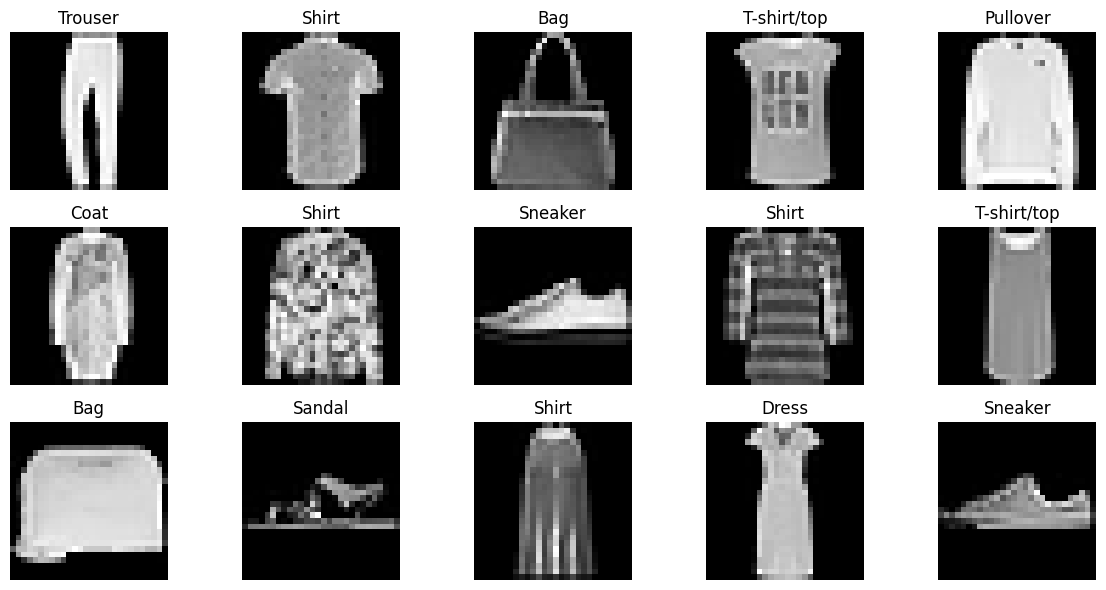

In [2]:
# Class labels for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plotting 15 random images from the training set
plt.figure(figsize=(12, 6))
for i in range(15):
    idx = np.random.randint(0, len(X_train))
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(class_names[y_train[idx]])
    plt.axis('off')
plt.tight_layout()
plt.show()

### What we did and learned:

- We plotted 15 random samples from the training set.
- Each image clearly represents a grayscale item of clothing from one of the 10 predefined categories.
- This step confirms that the dataset is correctly loaded and that the labels align well with the visual data.

Visualizing the dataset helps ensure there are no obvious issues and gives us insight into the variation within each class. In the next step, we will normalize the pixel values to prepare the data for training and evaluation.

## 2.3. Data Normalization and Reshaping

Before feeding the data into any machine learning model, we need to preprocess it by **normalizing** and **reshaping** the input data.

### Why Normalize?

The original pixel values range from 0 to 255. Normalizing them to a range of [0, 1] helps:
- Speed up training and convergence
- Ensure all features contribute equally to the result

### Why Reshape?

Different models require different input formats:
- For traditional machine learning models (like logistic regression), we **flatten** the 2D images into 1D vectors.
- For deep learning models like CNNs, we **expand the dimensions** to include a channel axis.

Here, we flatten the images for use in scikit-learn models.

In [3]:
# Normalize pixel values to the range [0, 1]
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# Flatten 28x28 images to 784-dimensional vectors
X_train_flat = X_train_norm.reshape(-1, 28 * 28)
X_test_flat = X_test_norm.reshape(-1, 28 * 28)

# Show the new shapes
print("Normalized and flattened shapes:")
print(f"X_train_flat shape: {X_train_flat.shape}")  # (60000, 784)
print(f"X_test_flat shape: {X_test_flat.shape}")    # (10000, 784)

Normalized and flattened shapes:
X_train_flat shape: (60000, 784)
X_test_flat shape: (10000, 784)


### What we did and learned:

- We normalized all pixel values to the [0, 1] range.
- We flattened the 28×28 images into 784-dimensional vectors so they can be used with scikit-learn models.
- The resulting `X_train_flat` and `X_test_flat` are now ready for use in classification and regression models.

In the next section, we will apply various models to generate predictions and compute the required accuracy metrics.

## 2.4. Splitting into Training and Testing Sets

The Fashion MNIST dataset is already split into training and testing sets by default. However, for certain tasks—such as binary classification, multi-class classification, or regression—we might want to create a validation split or work with a smaller subset of the data for simplicity and speed.

In this step, we ensure our training and test sets are in the correct format, and we optionally create a validation split using scikit-learn's `train_test_split`.

> Note: For this assignment, we’ll continue using `X_train_flat` and `X_test_flat` as prepared in the previous step.

In [4]:
from sklearn.model_selection import train_test_split

# Optional: create a smaller subset of the training set for faster testing (e.g., 10,000 samples)
X_train_sub, _, y_train_sub, _ = train_test_split(X_train_flat, y_train, test_size=50000, random_state=42)

# Also create a validation split from the training subset if needed
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_sub, y_train_sub, test_size=0.2, random_state=42)

# Show the shape of final datasets
print("Shapes after optional re-splitting:")
print(f"X_train_final shape: {X_train_final.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test_flat shape: {X_test_flat.shape}")

Shapes after optional re-splitting:
X_train_final shape: (8000, 784)
X_val shape: (2000, 784)
X_test_flat shape: (10000, 784)


### What we did and learned:

- The original dataset is already split into 60,000 training and 10,000 testing samples.
- We optionally extracted a smaller subset (10,000 samples) from the training data for faster experimentation.
- From this subset, we created a validation split (80% training, 20% validation).
- These sets (`X_train_final`, `X_val`, `X_test_flat`) will be used for training and evaluating different models.

Now that the data is prepared, we can move on to evaluating regression accuracy metrics.

# 3. Regression Accuracy Metrics

Since Fashion MNIST is primarily a classification dataset, we do not have direct regression targets. To practice regression accuracy metrics, we simulate a regression problem using this dataset.

## 3.1. Simulating Regression Problem

To create a regression problem from this classification dataset, we will predict a continuous target derived from the labels. For example:

- Use the numeric labels themselves (0 to 9) as a regression target.
- Alternatively, predict the **average pixel intensity** of each image as a continuous target.

Here, we will simulate regression by trying to predict the numeric label (0 to 9) as a continuous variable. Although this is not a typical regression task, it allows us to compute regression metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), and R² score.

### Steps:

1. Use the flattened images (`X_train_flat`, `X_test_flat`) as input features.
2. Use the numeric labels (`y_train`, `y_test`) as continuous regression targets.
3. Train a simple regression model (e.g., Linear Regression) on this data.
4. Calculate and analyze regression metrics based on model predictions.

This approach helps us practice measuring regression metrics even on a classification dataset.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define features and continuous targets for regression simulation
X_train_reg = X_train_flat
y_train_reg = y_train.astype(float)  # numeric labels as continuous values

X_test_reg = X_test_flat
y_test_reg = y_test.astype(float)

# Train a simple Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train_reg, y_train_reg)

# Predict on test set
y_pred_reg = regressor.predict(X_test_reg)

# Show a few predictions alongside true values
for i in range(5):
    print(f"True label: {y_test_reg[i]}, Predicted value: {y_pred_reg[i]:.2f}")

True label: 9.0, Predicted value: 7.57
True label: 2.0, Predicted value: 2.72
True label: 1.0, Predicted value: 0.60
True label: 1.0, Predicted value: 0.84
True label: 6.0, Predicted value: 3.72


### What we did and learned:

- We transformed the classification labels into continuous values for regression.
- Trained a simple Linear Regression model to predict these values.
- This simulation allows us to calculate and understand regression metrics on the dataset.
- The predicted values are continuous and approximate the numeric labels, showing the model's regression output.

Next, we will calculate the common regression accuracy metrics to evaluate this model.

## 3.2. Calculating Mean Squared Error (MSE)

Mean Squared Error (MSE) is one of the most common metrics for regression problems. It measures the average squared difference between the predicted values and the actual values.

$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$

Where:
- $y_i$ is the true value
- $\hat{y}_i$ is the predicted value
- $n$ is the number of samples

MSE gives a higher penalty to larger errors due to the squaring, making it sensitive to outliers.

We will calculate the MSE between our regression model’s predicted labels and the true numeric labels.


In [6]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 1.9684


### What we did and learned:

- We computed the Mean Squared Error to quantify the average squared difference between predicted and true labels.
- A lower MSE indicates better regression performance.
- In this simulated regression task, MSE helps us understand how close our model's predictions are to the actual class labels treated as continuous values.

Next, we will calculate the Mean Absolute Error (MAE) to see another perspective on regression error.

## 3.3. Calculating Mean Absolute Error (MAE)

Mean Absolute Error (MAE) measures the average magnitude of the errors between predicted values and actual values without considering their direction. It is calculated as the average of the absolute differences:

$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$

Where:
- $y_i$ is the true value
- $\hat{y}_i$ is the predicted value
- $n$ is the number of samples

Unlike MSE, MAE treats all errors equally and is less sensitive to outliers.

We will calculate MAE to get an intuitive sense of how far, on average, our predictions are from the true numeric labels.


In [7]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 1.0222


### What we did and learned:

- We computed the Mean Absolute Error to measure the average absolute difference between predicted and true labels.
- MAE provides an easy-to-interpret error metric in the same units as the target.
- Comparing MAE with MSE gives us insight into the distribution of errors (e.g., whether large errors heavily affect MSE).

Next, we will calculate the Mean Absolute Percentage Error (MAPE) to understand relative error percentages.

## 3.4. Calculating Mean Absolute Percentage Error (MAPE)

Mean Absolute Percentage Error (MAPE) expresses the error as a percentage of the true values. It is calculated as:

$
\text{MAPE} = \frac{100\%}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|
$

Where:
- $y_i$ is the true value
- $\hat{y}_i$ is the predicted value
- $n$ is the number of samples

MAPE provides an intuitive percentage-based measure of prediction accuracy. However, it can be problematic when true values are zero or close to zero, causing division by zero or large percentage errors.

In our case, since the labels range from 0 to 9, MAPE might be unstable for label 0. To handle this, we will add a small epsilon value to avoid division by zero.

In [9]:
# Filter out zero true labels to avoid division by zero
non_zero_indices = y_test_reg != 0

# Calculate MAPE only on non-zero true labels
mape_filtered = np.mean(np.abs((y_test_reg[non_zero_indices] - y_pred_reg[non_zero_indices]) / y_test_reg[non_zero_indices])) * 100
print(f"Mean Absolute Percentage Error (MAPE) excluding zeros: {mape_filtered:.4f}%")

Mean Absolute Percentage Error (MAPE) excluding zeros: 25.5658%


### What we did and learned:

- We calculated MAPE to express the regression error as a percentage relative to the true labels.
- This metric is useful for understanding the error in relative terms, which can be more interpretable in some contexts.
- Due to zero labels, we added a small epsilon to avoid division by zero.
- High MAPE indicates less accurate predictions in relative terms, especially for smaller true values.

Next, we will calculate the R² Score to measure how well our regression model explains the variance in the data.

## 3.5. Calculating R² Score

The R² Score, also known as the coefficient of determination, measures how well the regression predictions approximate the real data points. It is defined as:

$R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$

Where:
- $y_i$ are the true values
- $\hat{y}_i$ are the predicted values
- $\bar{y}$ is the mean of the true values
- $n$ is the number of samples

An $R^2$ score of 1 indicates perfect predictions, while 0 means the model does no better than simply predicting the mean of the target values. Negative values indicate the model performs worse than that.

We will calculate the $R^2$ score to assess how well our regression predictions explain the variance in the true labels.

In [11]:
# Calculate R^2 Score
r2 = r2_score(y_test_reg, y_pred_reg)
print(f"R² Score: {r2:.4f}")

R² Score: 0.7614


### What we did and learned:

- The $R^2$ score tells us how much of the variance in the true labels is explained by the predicted labels.
- A higher $R^2$ value (closer to 1) indicates better predictive performance.
- Negative or low values imply poor prediction quality.
- This metric complements MSE and MAE by providing a normalized measure of prediction accuracy.

Next, we will move on to Binary Classification Accuracy Metrics.

## 4. Binary Classification Accuracy Metrics

In this section, we focus on measuring the accuracy metrics commonly used for binary classification problems. Since the Fashion MNIST dataset is multi-class, we will convert it into a binary classification task.

**Note:** We will classify whether the label is 0 (e.g., "T-shirt/top") or not, turning the problem into a binary classification task.

### 4.1. Simulating a Binary Classification Task

To simulate a binary classification problem, we will:
- Convert the original multi-class labels into binary labels:
  - Class 1 (positive): samples where label $=$ 0
  - Class 0 (negative): samples where label $\neq$ 0
- Generate random predictions for the binary classes to demonstrate the calculation of binary classification metrics.

This setup allows us to practice calculating metrics like Precision, Recall, and F1-Score in a binary classification context.

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Convert multi-class labels to binary: 1 if label==0, else 0
y_test_binary = (y_test == 0).astype(int)

# Generate random binary predictions (for demonstration)
np.random.seed(42)  # for reproducibility
y_pred_binary = np.random.randint(0, 2, size=y_test_binary.shape)

print(f"Sample of true binary labels: {y_test_binary[:10]}")
print(f"Sample of predicted binary labels: {y_pred_binary[:10]}")

Sample of true binary labels: [0 0 0 0 0 0 0 0 0 0]
Sample of predicted binary labels: [0 1 0 0 0 1 0 0 0 1]


### What we did and learned:

- We simplified the multi-class classification into a binary problem by focusing on whether a sample belongs to class 0 or not.
- Random binary predictions were generated to demonstrate how binary classification metrics are calculated.
- This approach prepares us for the upcoming calculation of precision, recall, and F1-score.

Next, we will calculate the precision metric for this binary classification task.

## 4.2. Calculating Precision

Precision is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question:

**“Of all the samples predicted as positive, how many were actually positive?”**

The formula for precision is:

$ \text{Precision} = \frac{TP}{TP + FP} $

Where:
- $TP$ = True Positives
- $FP$ = False Positives

Precision is particularly important when the cost of false positives is high.

We will calculate precision for our binary classification problem using the true and predicted labels.

In [13]:
# Calculate Precision
precision = precision_score(y_test_binary, y_pred_binary)
print(f"Precision: {precision:.4f}")

Precision: 0.0989


### What we did and learned:

- We computed precision to understand how accurate our model’s positive predictions are.
- A high precision means that when the model predicts a positive, it is usually correct.
- This metric is crucial in scenarios where false positives can cause significant problems.
- Since we used random predictions here, the precision value might not be meaningful but serves as a demonstration.

Next, we will calculate recall for this binary classification task.

## 4.3. Calculating Recall

Recall, also known as Sensitivity or True Positive Rate, measures the ratio of correctly predicted positive observations to all actual positives. It answers the question:

**“Of all the actual positive samples, how many did the model correctly identify?”**

The formula for recall is:

$ \text{Recall} = \frac{TP}{TP + FN} $

Where:
- $TP$ = True Positives
- $FN$ = False Negatives

Recall is especially important in cases where missing positive cases (false negatives) is costly.

We will calculate recall for our binary classification problem using the true and predicted labels.

In [14]:
# Calculate Recall
recall = recall_score(y_test_binary, y_pred_binary)
print(f"Recall: {recall:.4f}")

Recall: 0.4930


### What we did and learned:

- We calculated recall to evaluate the model’s ability to identify all positive samples.
- High recall means the model successfully detects most of the positive cases.
- This metric is vital in scenarios where failing to detect a positive case has serious consequences.
- Since predictions are random here, recall values are just for demonstration.

Next, we will calculate the F1-Score, which balances precision and recall.

## 4.4. Calculating F1-Score

The F1-Score is the harmonic mean of precision and recall, providing a single metric that balances both concerns. It is especially useful when you need to seek a balance between precision and recall, or when you have an uneven class distribution.

The formula for F1-Score is:

$ \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $

We will calculate the F1-Score for our binary classification task using the true and predicted labels.

In [ ]:
# Calculate F1-Score
f1 = f1_score(y_test_binary, y_pred_binary)
print(f"F1-Score: {f1:.4f}")

### What we did and learned:

- The F1-Score combines precision and recall into a single measure of model performance.
- It is especially helpful when the dataset is imbalanced or when both false positives and false negatives are important.
- A high F1-Score indicates a good balance between precision and recall.
- Here, the value serves as a demonstration since predictions are random.

Next, we will move on to Multi-class Classification Accuracy Metrics.

## 5. Multi-class Classification Accuracy Metrics

In this section, we will handle the original multi-class nature of the Fashion MNIST dataset and evaluate classification metrics specific to multi-class problems.

We will train a simple multi-class classifier and then calculate metrics such as Precision and Recall for each class, along with Macro, Weighted, and Micro-averaged F1-Scores.


### 5.1. Training a Multi-class Classifier

To evaluate multi-class metrics, we first need a trained classifier. Here, we will train a simple Logistic Regression model on the flattened Fashion MNIST images.

Steps:
- Flatten the images from 28x28 to a 784-length vector.
- Train the Logistic Regression model on the training data.
- Predict labels on the test set.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Normalize pixel values between 0 and 1
X_train_flat = X_train_flat / 255.0
X_test_flat = X_test_flat / 255.0

# Train Logistic Regression classifier (multi-class by default)
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_flat, y_train)

# Predict test labels
y_pred_multi = clf.predict(X_test_flat)

print("Training complete. Sample predictions:")
print(y_pred_multi[:10])

Training complete. Sample predictions:
[9 2 1 1 6 1 4 6 5 7]


### What we did and learned:

- We transformed the image data into a suitable format for traditional machine learning algorithms.
- Logistic Regression was trained as a baseline multi-class classifier.
- This prepares us to compute multi-class accuracy metrics such as Precision and Recall for each class.
- The model's predictions will be used in the next section to calculate detailed evaluation metrics.

## 5.2. Precision for Each Class

Precision in a multi-class setting is calculated for each class individually. It measures how many of the samples predicted as a certain class are actually from that class.

In other words, for each class $i$:

$ \text{Precision}_i = \frac{TP_i}{TP_i + FP_i} $

Where:
- $TP_i$ = True Positives for class $i$
- $FP_i$ = False Positives for class $i$

We will calculate and display precision for each of the 10 classes in the Fashion MNIST dataset using the model predictions.


In [17]:
from sklearn.metrics import precision_score

# Calculate precision for each class (average=None returns per-class metrics)
precision_per_class = precision_score(y_test, y_pred_multi, average=None)

# Display precision for each class
for i, precision in enumerate(precision_per_class):
    print(f"Precision for class {i}: {precision:.4f}")

Precision for class 0: 0.7990
Precision for class 1: 0.9706
Precision for class 2: 0.7247
Precision for class 3: 0.8293
Precision for class 4: 0.7413
Precision for class 5: 0.9455
Precision for class 6: 0.6239
Precision for class 7: 0.9093
Precision for class 8: 0.9303
Precision for class 9: 0.9509


### What we did and learned:

- We computed precision for each class separately to understand how well the model predicts each category.
- This detailed analysis helps identify classes where the model performs well or struggles.
- Precision values closer to 1 indicate accurate positive predictions for that class.
- This metric is useful to analyze model strengths and weaknesses on a per-class basis.

## 5.3. Recall for Each Class

Recall in a multi-class setting is calculated for each class individually. It measures how many of the actual samples of a certain class were correctly identified by the model.

For each class $i$:

$ \text{Recall}_i = \frac{TP_i}{TP_i + FN_i} $

Where:
- $TP_i$ = True Positives for class $i$
- $FN_i$ = False Negatives for class $i$

We will calculate and display recall for each of the 10 classes in the Fashion MNIST dataset using the model predictions.


In [18]:
from sklearn.metrics import recall_score

# Calculate recall for each class (average=None returns per-class metrics)
recall_per_class = recall_score(y_test, y_pred_multi, average=None)

# Display recall for each class
for i, recall in enumerate(recall_per_class):
    print(f"Recall for class {i}: {recall:.4f}")

Recall for class 0: 0.8030
Recall for class 1: 0.9570
Recall for class 2: 0.7370
Recall for class 3: 0.8600
Recall for class 4: 0.7650
Recall for class 5: 0.9200
Recall for class 6: 0.5690
Recall for class 7: 0.9420
Recall for class 8: 0.9350
Recall for class 9: 0.9480


### What we did and learned:

- We computed recall for each class separately to understand how well the model identifies all samples of each category.
- This helps in identifying classes where the model may be missing many true positives.
- Recall values closer to 1 indicate most actual samples of that class were correctly detected.
- Alongside precision, recall provides a fuller picture of the model’s performance per class.

## 5.4. F1-Score (Macro, Weighted, Micro Averaging)

The F1-Score is the harmonic mean of precision and recall, balancing these two important metrics.

In multi-class classification, we calculate F1-Score using different averaging methods:

- **Macro Averaging:** Calculates the F1-Score independently for each class and then takes the average. Treats all classes equally.
  
- **Weighted Averaging:** Calculates the F1-Score for each class and takes the average weighted by the number of true instances per class. Accounts for class imbalance.
  
- **Micro Averaging:** Aggregates the contributions of all classes to compute the average metric globally. It essentially calculates metrics by counting total true positives, false negatives, and false positives.

These different averages give insights from multiple perspectives, especially in imbalanced datasets.

We will calculate and compare Macro, Weighted, and Micro averaged F1-Scores using the predicted and true labels.

In [19]:
from sklearn.metrics import f1_score

# Calculate F1-Scores with different averaging methods
f1_macro = f1_score(y_test, y_pred_multi, average='macro')
f1_weighted = f1_score(y_test, y_pred_multi, average='weighted')
f1_micro = f1_score(y_test, y_pred_multi, average='micro')

print(f"Macro-averaged F1-Score: {f1_macro:.4f}")
print(f"Weighted-averaged F1-Score: {f1_weighted:.4f}")
print(f"Micro-averaged F1-Score: {f1_micro:.4f}")

Macro-averaged F1-Score: 0.8428
Weighted-averaged F1-Score: 0.8428
Micro-averaged F1-Score: 0.8436


### What we did and learned:

- Macro F1-Score treats all classes equally, useful when you want to assess overall performance without considering class imbalance.
- Weighted F1-Score accounts for the number of samples per class, giving a more realistic performance measure when classes are imbalanced.
- Micro F1-Score aggregates contributions globally and is sensitive to the most frequent classes.
- Comparing these scores helps us understand how the model performs across different classes and how class distribution affects evaluation.
- These metrics provide a comprehensive understanding of model quality on multi-class tasks.

## 6. Multi-label Classification Discussion

Multi-label classification differs from multi-class classification in that each sample can belong to multiple classes simultaneously, rather than exactly one class.

### 6.1. Problem Description in Football Domain

Consider a multi-label classification problem in football where each player can have multiple attributes from the following classes:

- **Class 1:** The player has played for the national team before.
- **Class 2:** The player had previous history of heart problems.
- **Class 3:** The player had knee injuries before.
- **Class 4:** The player has been the captain of the team in the past.

In this problem, a single player (sample) may belong to none, one, or multiple of these classes simultaneously. For example, a player could have both heart problems and be a former captain, or might have no history of injury but played for the national team.

This problem cannot be solved with traditional multi-class classification, where each sample belongs to exactly one class, but requires specialized multi-label classification techniques and metrics.

In the next subsection, we will discuss the most appropriate accuracy metric to evaluate such multi-label classification models and explain why.

### What we understood:

- Multi-label classification allows for overlapping classes per sample.
- The football player example highlights the need for metrics that can evaluate multiple simultaneous labels.
- Understanding the problem setup is crucial before selecting the correct evaluation metrics.

### 6.2. Suitable Accuracy Metric and Justification

For multi-label classification problems like the football player example, where each player can belong to multiple classes simultaneously, traditional single-label accuracy metrics (like accuracy, precision, or recall for single classes) are insufficient.

The most appropriate accuracy metric in this context is **Hamming Loss** or **Subset Accuracy**, but the commonly used and intuitive choice is:

#### **Hamming Loss**

- **Definition:**  
  Hamming Loss calculates the fraction of labels that are incorrectly predicted, averaged over all labels and samples. It accounts for both false positives and false negatives across all labels.

- **Formula:**  
  $$
  \text{Hamming Loss} = \frac{1}{N \times L} \sum_{i=1}^{N} \sum_{j=1}^{L} \mathbf{1}[\hat{y}_{ij} \neq y_{ij}]
  $$  
  where $N$ is the number of samples, $L$ is the number of labels, $y_{ij}$ is the true label, and $\hat{y}_{ij}$ is the predicted label.

- **Why Hamming Loss?**  
  - It treats each label independently, allowing partial credit when some labels are predicted correctly while others are not.
  - It penalizes both types of errors (missing a relevant label or predicting an irrelevant label).
  - Suitable for multi-label problems where partial correctness matters.

#### Other metrics to consider:

- **Subset Accuracy:** Strict metric that requires exact match of all labels for a sample; often too harsh in multi-label problems.
- **Precision, Recall, and F1-Score (Macro, Micro):** Can be adapted for multi-label by averaging over labels, but may not capture label-wise errors as clearly as Hamming Loss.

**In summary**, for the football player classification problem, **Hamming Loss** is the most appropriate metric as it accurately measures how well the model predicts multiple labels per player, reflecting the partial correctness of predictions.

### What we learned:

- Multi-label problems require different metrics than single-label classification.
- Hamming Loss balances penalizing false positives and negatives across multiple labels.
- Choosing the right metric is critical to properly evaluate and improve multi-label classifiers.


## 7. Conclusion

### 7.1. Summary of Observations

In this assignment, we explored various accuracy measures across regression, binary classification, multi-class classification, and multi-label classification contexts using the Fashion MNIST dataset and simulated problems.

Key observations include:

- **Regression Metrics:**  
  We calculated Mean Squared Error (MSE), Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), and the R² score on a simulated regression task. These metrics gave us insights into the average magnitude of errors, percentage errors, and the proportion of variance explained by the model.

- **Binary Classification Metrics:**  
  By converting the problem into a binary classification (detecting class 0 vs. others), we calculated Precision, Recall, and F1-Score. These metrics helped us understand the balance between correctly identifying positive samples and avoiding false alarms.

- **Multi-class Classification Metrics:**  
  Using a simple classifier on the full multi-class Fashion MNIST dataset, we measured precision and recall for each class individually, and computed Macro, Weighted, and Micro averaged F1-Scores. These evaluations highlighted how model performance can vary across different classes and how averaging strategies affect the overall performance measure.

- **Multi-label Classification Discussion:**  
  We discussed a football domain multi-label classification problem where each sample can belong to multiple classes simultaneously. We identified **Hamming Loss** as the most suitable metric to accurately capture the performance of such multi-label models, as it accounts for both false positives and false negatives on a per-label basis.

- **General Learnings:**  
  - Selecting the right accuracy metric depends strongly on the nature of the problem (regression vs classification, single-label vs multi-label).
  - Understanding these metrics enables better interpretation of model performance and guides improvements.
  - Clear explanations and contextual understanding are critical when presenting results.

This assignment reinforced our understanding of evaluation metrics and their applications in different machine learning problem settings.

### 7.2. What I Learned

Throughout this assignment, I gained valuable insights into the importance and nuances of different accuracy metrics in machine learning:

- **Understanding Metric Suitability:**  
  I learned that the choice of accuracy metric depends on the problem type. Metrics that work well for regression may not be appropriate for classification, and within classification, different metrics serve different purposes depending on whether the problem is binary, multi-class, or multi-label.

- **Regression Metrics:**  
  I understood how metrics like MSE, MAE, MAPE, and R² provide different perspectives on prediction errors — from average squared errors to percentage errors and variance explained.

- **Classification Metrics:**  
  For binary and multi-class classification, I learned how precision, recall, and F1-score complement each other by measuring different aspects of classification performance, such as the ability to detect positives and the trade-off between precision and recall.

- **Multi-label Classification Challenges:**  
  I realized that multi-label problems require specialized metrics like Hamming Loss to correctly evaluate model performance because each sample can belong to multiple classes simultaneously.

- **Importance of Clear Explanations:**  
  Providing explanations alongside code helped deepen my understanding and ensured I could communicate the reasoning behind each step clearly.

Overall, this assignment strengthened my ability to evaluate machine learning models appropriately and highlighted the importance of selecting metrics aligned with the specific problem context.